# DATA UNDERSTANDING
    

Wanting to know what actions to be taken according to the information in the datasets.

The type of films that are currently doing well(genres) in terms of gross profit

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\Karen\\Documents\\Microsoft-project\\Microsoft-project\\zippedData\\bom.movie_gross.csv.gz")
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
# describing the dataset to get a statistical view of it
df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [4]:
# info to check for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
# shape 
df.shape

(3387, 5)

In [6]:
# checking the first five rows
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [7]:
# checking the last rows
df.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


Finding the relatonship between variables

In [ ]:
# creating a plot
# generating the x-axis variable as stidio
x = df['year']

# y-axis variable as domestic gross
y = df['domestic_gross']

fig, ax = plt.subplots(x, y)
figure = plt.show
plt.style.use('ggplot')

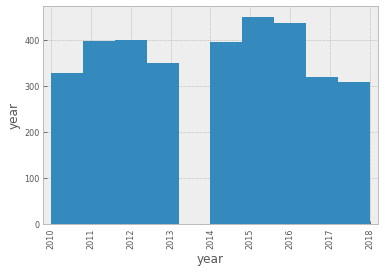

In [37]:
pd.plotting.scatter_matrix(df);
plt.style.use('bmh')

                DATA CLEANING

In [9]:
# checking for null values
df.isna().any()

title             False
studio             True
domestic_gross     True
foreign_gross      True
year              False
dtype: bool

studio, domestic_gross and foreign_gross all contain missing values.

In [10]:
# checking the number of missing values
df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [11]:
# checking for duplicated values
duplicates = df[df.duplicated()]
print(len(duplicates))
duplicates.head()

0


,title,studio,domestic_gross,foreign_gross,year


There are no duplicated values in this dataset.

In [12]:
# determining the percentage of rows with missing data in foreign_gross column
print('Percentage of Null foreign_gross Values:', len(df[df.foreign_gross.isna()])/ len(df))
print('Number of Unique foreign_gross Values:', df.foreign_gross.nunique())


Percentage of Null foreign_gross Values: 0.3985828166519043
Number of Unique foreign_gross Values: 1204


there are very few missing values meaning the column has meaningful information for it
to be dropped.

In [13]:
# replacing string object with a float 
df['foreign_gross'] = df['foreign_gross'].str.replace(',','').astype(float)

Mean Value for foreign_gross column: 74872810.15046637
Median Value for foreign_gross column: 18700000.0


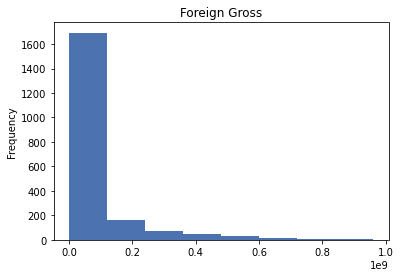

In [14]:
# dealing with missing values in foreign_gross column
foreign_gross_mean = df['foreign_gross'].mean()
foreign_gross_median = df['foreign_gross'].median()

ax = df['foreign_gross'].plot(kind = 'hist', bins = 8,)
ax.set_title('Foreign Gross')
ax;
plt.style.use('ggplot')
print("Mean Value for foreign_gross column: {}".format(foreign_gross_mean))
print("Median Value for foreign_gross column: {}".format(foreign_gross_median))



it is positively skewed so we'll use median to replace the missing values

In [15]:
df['foreign_gross'] = df['foreign_gross'].fillna(value = df['foreign_gross'].median)

In [16]:
# changes made
df.isna().sum()

title              0
studio             5
domestic_gross    28
foreign_gross      0
year               0
dtype: int64

In [17]:
# dealing with domestic_gross missing values
#determining the percentage of rows with missing data in domestic_gross column
print('Percentage of Null domestic_gross Values:', len(df[df.domestic_gross.isna()])/ len(df))
print('Number of Unique domestic_gross Values:', df.domestic_gross.nunique())


Percentage of Null domestic_gross Values: 0.008266902863891349
Number of Unique domestic_gross Values: 1797


thisis a very small percentage of data to be dropped.

Mean Value for domestic_gross column: 28745845.06698422
Median Value for domestic_gross column: 1400000.0


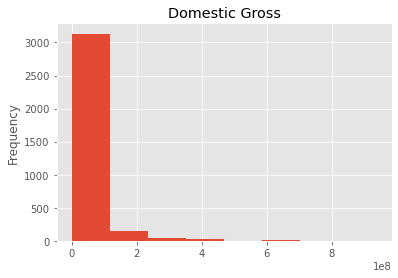

In [18]:
# dealing with missing values in domestic_gross column
domestic_gross_mean = df['domestic_gross'].mean()
domestic_gross_median = df['domestic_gross'].median()

ax = df['domestic_gross'].plot(kind = 'hist', bins = 8,)
ax.set_title('Domestic Gross')

ax;
plt.style.use('ggplot')
print("Mean Value for domestic_gross column: {}".format(domestic_gross_mean))
print("Median Value for domestic_gross column: {}".format(domestic_gross_median))



The graph is positively skewed meaning we'll use median to replace missing values.

In [19]:
df['domestic_gross'] = df['domestic_gross'].fillna(value = df['domestic_gross'].median)

In [20]:
# changes made
df.isna().sum()

title             0
studio            5
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [21]:
# dealing with the missing values in studio
df = df.dropna()
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,4.15e+08,6.52e+08,2010
1,Alice in Wonderland (2010),BV,3.342e+08,6.913e+08,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,2.96e+08,6.643e+08,2010
3,Inception,WB,2.926e+08,5.357e+08,2010
4,Shrek Forever After,P/DW,2.387e+08,5.139e+08,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200,<bound method Series.median of 0 6520000...,2018
3383,Edward II (2018 re-release),FM,4800,<bound method Series.median of 0 6520000...,2018
3384,El Pacto,Sony,2500,<bound method Series.median of 0 6520000...,2018
3385,The Swan,Synergetic,2400,<bound method Series.median of 0 6520000...,2018


In [22]:
df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

Checking for outliers

In [29]:
def plot_boxplot(linda, col):
    df.boxplot(column = [col])
    plt.grid(False)
    plt.show()

KeyError: "None of [Index(['domestic_gross'], dtype='object')] are in the [columns]"

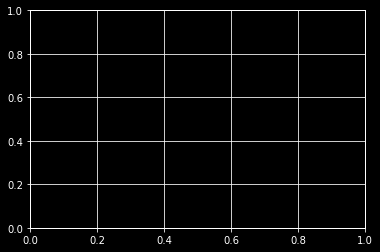

In [31]:
# boxplot for domestic_gross
plt.style.use('dark_background')
plot_boxplot(df, 'domestic_gross')

In [41]:
df.head(20)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,4.15e+08,6.52e+08,2010
1,Alice in Wonderland (2010),BV,3.342e+08,6.913e+08,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,2.96e+08,6.643e+08,2010
3,Inception,WB,2.926e+08,5.357e+08,2010
4,Shrek Forever After,P/DW,2.387e+08,5.139e+08,2010
5,The Twilight Saga: Eclipse,Sum.,3.005e+08,3.98e+08,2010
6,Iron Man 2,Par.,3.124e+08,3.115e+08,2010
7,Tangled,BV,2.008e+08,3.91e+08,2010
8,Despicable Me,Uni.,2.515e+08,2.916e+08,2010
9,How to Train Your Dragon,P/DW,2.176e+08,2.773e+08,2010


## SECOND DATASET

In [ ]:
data = pd.read_csv